# Iris Data Set  
-----------------------------------------------------------------------------------
The Iris dataset can be found on the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris). 
![title](iris-flowers.png)

### Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. `One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.` 

**_Predicted attribute: class of iris plant._**


**Attribute Information:**

- sepal length in cm 
- sepal width in cm 
- petal length in cm 
- petal width in cm 
- class: 
    - Iris Setosa 
    - Iris Versicolour 
    - Iris Virginica

#### Mission: Download the dataset and try to predict the iris class using decision tree, also answer the following questions while working in each section.

## Q1: This problem belongs to which type of machine learning? (supervised, unsupervised, reinforcement , .. etc)

Ans: As there are a target column and classes are pre-defined before we start making the learner/model then it's a supervised problem


## Q2: And to which category ? (Regression, Classification, Clustering, ...etc)

Ans: we classify Iris flowers into a set of discrete classes, so obviously it's a classification problem.

### Section 1:
import libraries that you will need to achieve your task.


In [1]:
import pandas as pd
import numpy as np 
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

/home/noreen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Section 2:
- import your dataset using pandas.

- explore your dataset in order to be familiar with it and build intuition.
hint: exploration can be done by showing the data, describing them, maybe show some statistics ... do your best and always be curious :D

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa



Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None



Data Statistics: 
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066    

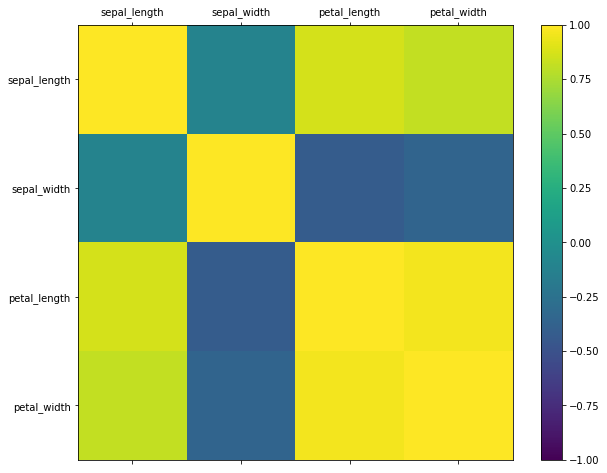

In [2]:
df = pd.read_csv('iris_data.csv', names = ['sepal_length','sepal_width','petal_length','petal_width','class'])
print(df.head())


#splistting features and target 
features = df.drop('class', axis=1)
target = df['class']

print('\n\n')
print('Data info:','\n')
print(df.info())

print('\n\n')
print('Data Statistics:','\n',df.describe())

print('\n\n')
correlation = df.corr()
print('Correlation matrix:','\n', correlation)



fig, ax = plt.subplots(figsize=(10, 8))
#ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticklabels(['','sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
ax.set_yticklabels(['','sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

plt.show()


### Section 3:
`One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.` Remember this line in the description that you ignored ? :P

Now in order to understand what this line mean, please use a scatter plot to plot all 3 classes of iris in one plot putting 'Sepal length' on the X-axis and `Sepal width` on the Y-axis. Also give your plot a title cause clean code always pays off ;)

## Q3: Now after finishing your awesome plot, what do you think the line that of the description mean? 
simply,it means that the iris setosa class can be separated from the other 2 classes by a line or more specifically a hyperplane.    

Text(0.5,1,'linearly separable')

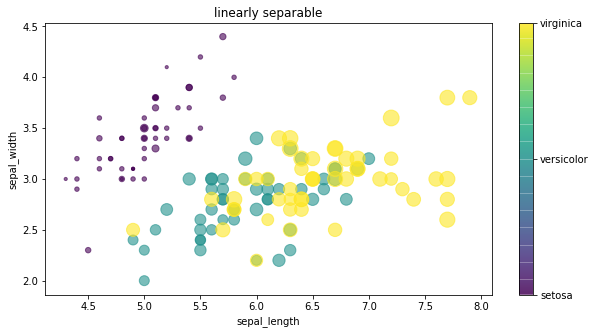

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
#scatter plot
x = df['sepal_length']
y = df['sepal_width']
size = df['petal_width']

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(10, 5))
plt.scatter(x,y, s= 100*size, c = iris.target, cmap = 'viridis', alpha = 0.6)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('linearly separable')

### Section 4:
Now after we have explored and got familiar with the data before we start with our decision tree model, we need to split our dataset into a training and testing sets.
we will do this using `train_test_split` function from `sklearn.cross_validation`

Note: by convention we split our dataset into 70% training and 30% testing or 80% training and 20% testing ... let's stick with the 80-20% for now 

Typically, our data needs to be shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset; this ensures results are consistent.

You will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `class` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
  
  ## Q4: shuffling data makes our dataset consistent, but in your opinion why do you think it's very important in that specific dataset?
Our dataset consists of 150 row every class of the iris takes 50 sequential row,
so if we devided the 150 rows into 80-20 % this means that we will divide it so the first 120 rows are for training and the remaining 30 rows which are of class Iris_Virginica are for testing so, if we didn't shuffle the data in order to randomize the classes across the dataset that means that we will only make predictions for the Iris Virginica only.

In [4]:

#splitting the whole dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


### Section 5:
- use `DecesionTreeClassifier` from `sklearn.tree` to classify and fit your data.
- predict target output using the testing data that you have made during `train_test_split`

In [5]:
model = DecisionTreeClassifier()
fittedModel = model.fit(X_train, y_train)
predictions = fittedModel.predict(X_test)


### Section 6:
in order to make sure that most of our predictions are correct, we need to calculate the accuracy of our prediction.

using `acuracy_score` from `sklearn.metrics` please calculate your model accuracy.

## Q5: What is your model accuracy ? what does it mean ?
accuracy is 1, It means that all of the we got the right prediction(target variable) for all of the testing features

In [6]:
print(accuracy_score(y_test, predictions))

1.0
